In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
from datetime import datetime

In [32]:
# f = open("AllPSRs.txt",'r')
all_psrs = pd.read_csv('AllPSRs.txt',header = None)

In [33]:
all_pulsars = list(all_psrs[0])
# all_pulsars

In [34]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'june':6, 'jun':6, 'july':7, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

In [35]:
f1 = open('New_ALLPATHSALLPSRS.txt','r')

In [36]:
all_paths = f1.readlines()

In [37]:
all_paths

['./34_102_set1_13May2018.cmd.txt:**********  Phasing 2 and PSR  J0437-4715 *************** 14:00\n',
 './35_016_set1_24Dec2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 00:00\n',
 './34_102_set1_3Aug2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 09:00\n',
 './35_016_set1_2Nov2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 03:45\n',
 './34_102_set1_16Jul2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 10:00\n',
 './34_102_set1_15Jun2018.cmd.txt:**********  Phasing 2 and PSR  J0437-4715 *************** 12:00\n',
 './34_102_set1_17Aug2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 08:00\n',
 './34_102_set1_5May2018_makeup.cmd.txt:**********  Phasing 1 and PSR  J0437-4715 *************** 15:30\n',
 './35_016_set1_18Mar2019.cmd.txt:**********  Phasing 1 and PSR J0437-4715 *************** 17:45\n',
 './34_102_set1_27apr18.cmd.txt:**********  Phasing 1 and PSR  J0437-4715 **********

In [38]:
def get_MJDs(path):
    print(path)
    path_comps = path.split('_')
    for i,pc in enumerate(path_comps):
        if 'cmd' in pc:
            if 'makeup' in pc:
                mjd_info = path_comps[i-1]
            elif '23july18' in pc:
                mm = 7
                yyyy = 2018
                dd = 23
                t = Time(datetime(yyyy,mm,dd))
                mjd = t.mjd    
                return mjd
            else:
                mjd_info = pc
    date_info = mjd_info.split('.')
    date = date_info[0].lower()
    for month in list(months.keys()):
        if month in date:
            mm = months[month]
            day_n_month = date.split(month)
            dd = int(day_n_month[0])
            yyyy = int(day_n_month[1])
            if yyyy <2000:
                yyyy += 2000
            t = Time(datetime(yyyy,mm,dd))
            mjd = t.mjd    
            return mjd
    
            
    

In [39]:
psrwise_mjds = []
for psr in all_pulsars:
    mjds = []
    for path in all_paths:
        if psr in path:
            mjd = get_MJDs(path)
            if mjd == None:
                print(path)
            mjds.append(mjd)
    psrwise_mjds.append(mjds)
            

./34_102_set1_13May2018.cmd.txt:**********  Phasing 2 and PSR  J0437-4715 *************** 14:00

./35_016_set1_24Dec2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 00:00

./34_102_set1_3Aug2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 09:00

./35_016_set1_2Nov2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 03:45

./34_102_set1_16Jul2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 10:00

./34_102_set1_15Jun2018.cmd.txt:**********  Phasing 2 and PSR  J0437-4715 *************** 12:00

./34_102_set1_17Aug2018.cmd.txt:**********  Phasing 2 and PSR J0437-4715 *************** 08:00

./34_102_set1_5May2018_makeup.cmd.txt:**********  Phasing 1 and PSR  J0437-4715 *************** 15:30

./35_016_set1_18Mar2019.cmd.txt:**********  Phasing 1 and PSR J0437-4715 *************** 17:45

./34_102_set1_27apr18.cmd.txt:**********  Phasing 1 and PSR  J0437-4715 *************** 15:00

./35_016_set1_7Jan2019.cmd.txt:***

In [40]:
psr_mjds = dict(zip(all_pulsars,psrwise_mjds))

In [41]:
psr_mjds

{'J0437-4715': [58251.0,
  58476.0,
  58333.0,
  58424.0,
  58315.0,
  58284.0,
  58347.0,
  58243.0,
  58560.0,
  58235.0,
  58490.0,
  58532.0,
  58517.0,
  58546.0,
  58436.0,
  58463.0,
  58504.0,
  58363.0,
  58299.0,
  58378.0,
  58411.0,
  58266.0,
  59516.0,
  59528.0,
  59539.0,
  59545.0,
  59556.0,
  59565.0,
  59575.0,
  59587.0,
  59596.0,
  59604.0,
  59615.0],
 'J0613-0200': [58517.0,
  58251.0,
  58476.0,
  58333.0,
  58424.0,
  58315.0,
  58284.0,
  58347.0,
  58243.0,
  58560.0,
  58235.0,
  58490.0,
  59355.0,
  59364.0,
  59385.0,
  59397.0,
  59406.0,
  59418.0,
  59427.0,
  59435.0,
  59484.0,
  59446.0,
  59456.0,
  59467.0,
  59475.0,
  59492.0,
  58532.0,
  58546.0,
  58436.0,
  58463.0,
  58504.0,
  58363.0,
  58299.0,
  58378.0,
  58411.0,
  58266.0,
  59516.0,
  59528.0,
  59539.0,
  59545.0,
  59556.0,
  59565.0,
  59575.0,
  59587.0,
  59596.0,
  59604.0,
  59615.0],
 'J0645+5158': [58517.0,
  58251.0,
  58476.0,
  58333.0,
  58424.0,
  58315.0,
  58284.0,

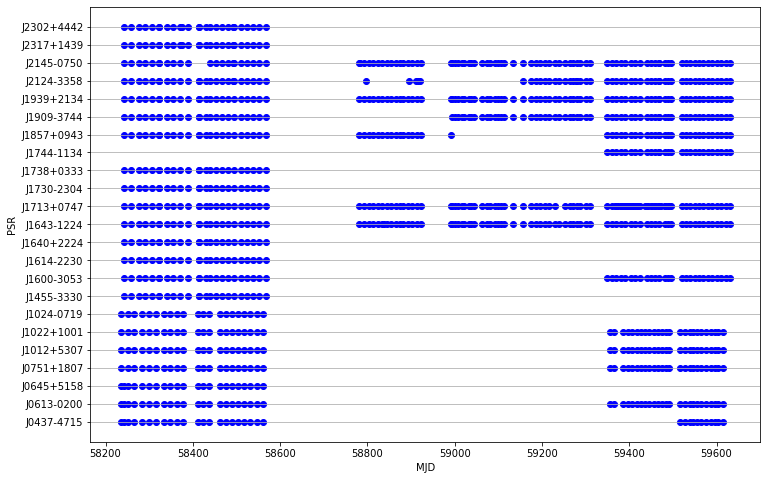

In [42]:
fig = plt.figure(figsize=(12,8))
sdict = dict(marker='o', color='blue')
for i,psr in enumerate(all_pulsars):
    y = 10*i + 10
    epochs = psr_mjds[psr]
    for e in epochs:
        plt.scatter(int(e),y,**sdict)
    
indexes = np.arange(10,240,10)
plt.yticks(indexes,all_pulsars)
plt.xlabel ('MJD')
plt.ylabel ('PSR')

plt.grid (axis='y')
plt.savefig('cadenceplotv2.pdf',dpi=300, bbox_inches='tight')
plt.show()

In [45]:
#Adding Band info
f2 = open('BandInfo.txt','r')
band_info = f2.readlines()

In [46]:
band_info

['./35_016_setup_18Nov2018.txt:BAND            : BAND 5 (1000 - 1460)\n',
 './35_016_setup_18Nov2018.txt:BAND            : BAND 3 (250-500)\n',
 './35_016_setup_18Nov2018.txt:BAND            : BAND 4 (550-900)\n',
 './35_016_setup_29Dec2018.txt:BAND            : BAND 5 (1000 - 1460)\n',
 './35_016_setup_29Dec2018.txt:BAND            : BAND 3 (250-500)\n',
 './35_016_setup_29Dec2018.txt:BAND            : BAND 4 (550-900)\n',
 './35_016_setup.10Feb2019.txt:BAND            : BAND 5 (1000 - 1460)\n',
 './35_016_setup.10Feb2019.txt:BAND            : BAND 3 (250-500)\n',
 './35_016_setup.10Feb2019.txt:BAND            : BAND 4 (550-850)\n',
 './35_016_setup_10Sep2018.txt:BAND            : BAND 5 (1000 - 1460)\n',
 './35_016_setup_10Sep2018.txt:BAND            : BAND 3 (250-500)\n',
 './35_016_setup_10Sep2018.txt:BAND            : BAND 4 (550-900)\n',
 './35_016_setup_24Dec2018.txt:BAND            : BAND 5 (1000 - 1460)\n',
 './35_016_setup_24Dec2018.txt:BAND            : BAND 3 (250-500)\n',


In [47]:
band3_mjds = []
band4_mjds = []
band5_mjds = []
def get_Band_MJDs(path):
    path_comps = path.split('_')
    if '1460' in path:
        c = 5
    elif '550' in path:
        c = 4
    elif '250' in path:
        c = 3
    for i,pc in enumerate(path_comps):
        if ':BAND' in pc:
            if 'makeup' in pc:
                mjd_info = path_comps[i-1]
            elif '10Feb2019'in pc:
                mm = 2
                yyyy = 2019
                dd = 10
                t = Time(datetime(yyyy,mm,dd))
                mjd = t.mjd    
                if c == 3:
                    band3_mjds.append(mjd)
                elif c == 4:
                    band4_mjds.append(mjd)
                elif c==5:
                    band5_mjds.append(mjd)
                return mjd
                
            else:
                mjd_info = pc
    date_info = mjd_info.split('.')
    date = date_info[0].lower()
    for month in list(months.keys()):
        if month in date:
            mm = months[month]
            day_n_month = date.split(month)
            dd = int(day_n_month[0])
            yyyy = int(day_n_month[1])
            if yyyy <2000:
                yyyy += 2000
            t = Time(datetime(yyyy,mm,dd))
            mjd = t.mjd
            if c == 3:
                band3_mjds.append(mjd)
            elif c == 4:
                band4_mjds.append(mjd)
            elif c==5:
                band5_mjds.append(mjd)
            return mjd

In [48]:
for path in band_info:
    print(get_Band_MJDs(path))

58440.0
58440.0
58440.0
58481.0
58481.0
58481.0
58524.0
58524.0
58524.0
58371.0
58371.0
58371.0
58476.0
58476.0
58476.0
58363.0
58363.0
58363.0
58235.0
58235.0
58235.0
58463.0
58463.0
58463.0
58251.0
58251.0
58251.0
58241.0
58241.0
58241.0
58567.0
58567.0
58567.0
58291.0
58291.0
58291.0
58532.0
58532.0
58532.0
58495.0
58495.0
58495.0
58355.0
58355.0
58355.0
58436.0
58436.0
58436.0
58560.0
58560.0
58560.0
59355.0
59355.0
59360.0
59360.0
59349.0
59349.0
59364.0
59364.0
59370.0
59370.0
59376.0
59376.0
59380.0
59380.0
59385.0
59385.0
59391.0
59391.0
59397.0
59397.0
59403.0
59403.0
58510.0
58510.0
58510.0
58504.0
58504.0
58504.0
58546.0
58546.0
58546.0
58453.0
58453.0
58453.0
59367.0
59367.0
59384.0
59374.0
59374.0
59382.0
59382.0
59395.0
59402.0
59397.0
59390.0
59062.0
59062.0
59022.0
59022.0
59001.0
59001.0
59113.0
59113.0
59133.0
59133.0
59106.0
59106.0
59100.0
59100.0
59075.0
59075.0
59032.0
59032.0
59008.0
59008.0
59082.0
59082.0
59044.0
59044.0
59038.0
59038.0
59093.0
59093.0
58993.0


In [49]:
band3_mjds

[58440.0,
 58481.0,
 58524.0,
 58371.0,
 58476.0,
 58363.0,
 58235.0,
 58463.0,
 58251.0,
 58241.0,
 58567.0,
 58291.0,
 58532.0,
 58495.0,
 58355.0,
 58436.0,
 58560.0,
 59355.0,
 59360.0,
 59349.0,
 59364.0,
 59370.0,
 59376.0,
 59380.0,
 59385.0,
 59391.0,
 59397.0,
 59403.0,
 58510.0,
 58504.0,
 58546.0,
 58453.0,
 59367.0,
 59374.0,
 59382.0,
 59395.0,
 59402.0,
 59062.0,
 59022.0,
 59001.0,
 59113.0,
 59133.0,
 59106.0,
 59100.0,
 59075.0,
 59032.0,
 59008.0,
 59082.0,
 59044.0,
 59038.0,
 59093.0,
 58993.0,
 59016.0,
 58467.0,
 58424.0,
 58284.0,
 58921.0,
 58552.0,
 58340.0,
 58322.0,
 58389.0,
 58276.0,
 58299.0,
 58307.0,
 58333.0,
 58347.0,
 58378.0,
 58449.0,
 58538.0,
 58517.0,
 58315.0,
 58375.0,
 58490.0,
 58259.0,
 58413.0,
 58411.0,
 58813.0,
 58824.0,
 58882.0,
 58991.0,
 58833.0,
 58792.0,
 58914.0,
 58782.0,
 58874.0,
 58903.0,
 58837.0,
 58922.0,
 58844.0,
 58854.0,
 58893.0,
 58804.0,
 58781.0,
 58865.0,
 58431.0,
 59156.0,
 59175.0,
 59196.0,
 59187.0,
 59208.0,


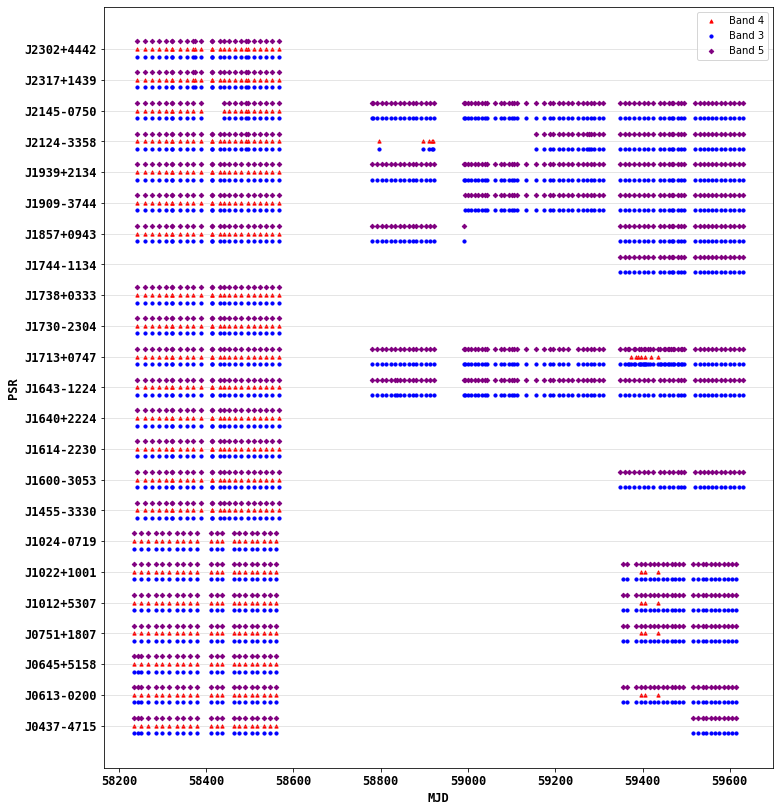

In [51]:
fig = plt.figure(figsize=(12,14))
# sdict = dict(marker='o', color='blue')
B3DICT = dict(marker='o', color='blue', s=10)
B4DICT = dict(marker='^', color='red', s=10)
B5DICT = dict(marker='D', color='purple', s=10)
for i,psr in enumerate(all_pulsars):
    y = 20*i + 20
    epochs = psr_mjds[psr]
    for e in epochs:
        if e in band4_mjds:
            if e == 58440 and psr == 'J1713+0747':
                plt.scatter(int(e),y,**B4DICT,label = 'Band 4')
            else:
                plt.scatter(int(e),y,**B4DICT)
        if e in band3_mjds:
            if e == 58440 and psr == 'J1713+0747':
                plt.scatter(int(e),y-5,**B3DICT,label = 'Band 3')
            else:
                plt.scatter(int(e),y-5,**B3DICT)
        if e in band5_mjds:
            if e == 58440 and psr == 'J1713+0747':
                plt.scatter(int(e),y+5,**B5DICT,label = 'Band 5')
            else:
                plt.scatter(int(e),y+5,**B5DICT)
    
indexes = np.arange(20,480,20)
plt.yticks(indexes,all_pulsars,fontweight = 'bold',fontsize = '12',fontname = 'monospace')
plt.xticks(fontweight = 'bold',fontsize = '12',fontname = 'monospace')
plt.xlabel ('MJD',fontweight = 'bold',fontsize = '12',fontname = 'monospace')
plt.ylabel ('PSR',fontweight = 'bold',fontsize = '12',fontname = 'monospace')
plt.legend(loc = 'best')
plt.grid (axis='y',alpha = 0.4)
plt.savefig('JoAA_cadenceplot-withbandinfo.pdf',dpi=300, bbox_inches='tight')
plt.show()